MLP(DNN) -> 컴퓨터비전(이미지 처리)

CNN(convolutional Neural Network)이 나오게 된 이유
convolutional : 합성곱

강아지 사진 분류기를 MLP로 만들었을 떄, 강아지 사진의 각도나 거리가 달라졌을때, 구분을 하지 못함.

CNN을 이용하면 이미지에서 특징들을 추출해서 특징값을 input으로 함

추출할 수 있는 특징 : 질감, 각도, 길이, 두께

convolution layer 
- filter size를 결정해 정해진 stride 길이에 따라 이미지를 조각내어 인식
입력데이터로부터 특징을 추출하는 역할을 수행하는 계층

pooling layer(선택)
- 특징의 대표값 추출 => 압축
- 보편적으로 maxpooling 사용함


flatten
- 이미지로부터 다양한 특이점을 뽑아내고 이것을 1차원의 데이터로 변형

필터 : 특징을 추출하는 기능
활성화 함수 : 필터가 추출한 값을 비선형 값으로 변경


스트라이드(strid)


In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
image = np.array([[[[1],[2],[3]],
                  [[4],[5],[6]],
                  [[7],[8],[9]]]],dtype=np.float32)

In [3]:
image.shape

(1, 3, 3, 1)

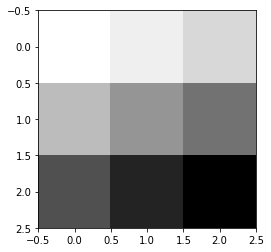

In [4]:
plt.imshow(image.reshape(3,-1), cmap='Greys')

In [5]:
weight = tf.constant([[[[1.]],[[1.]]],
                      [[[1.]],[[1.]]]])
weight.shape

TensorShape([Dimension(2), Dimension(2), Dimension(1), Dimension(1)])

In [6]:
# 합성곱
sess = tf.InteractiveSession() # eval
conv2d = tf.nn.conv2d(image, weight, strides=[1,1,1,1], padding='VALID')
conv2dImage = conv2d.eval() # 합성곱 연산 실행됨

In [7]:
conv2dImage.shape

(1, 2, 2, 1)

[[12. 16.]
 [24. 28.]]


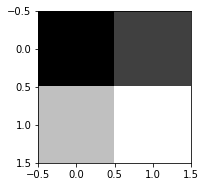

In [8]:
for i,img in enumerate(conv2dImage):
    print (img.reshape(2,-1))
    plt.subplot(1,2,i+1)
    plt.imshow(img.reshape(2,-1), cmap='gray')

In [9]:
# 합성곱
sess = tf.InteractiveSession() # eval
conv2d = tf.nn.conv2d(image, weight, strides=[1,1,1,1], padding='SAME')
conv2dImage = conv2d.eval() # 합성곱 연산 실행됨
conv2dImage.shape

C:\Users\student\Anaconda3\lib\site-packages\tensorflow_core\python\client\session.py:1750: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


(1, 3, 3, 1)

[[12. 16.  9.]
 [24. 28. 15.]
 [15. 17.  9.]]


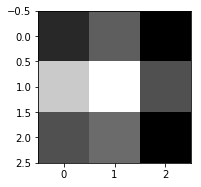

In [10]:
for i,img in enumerate(conv2dImage):
    print (img.reshape(3,-1))
    plt.subplot(1,2,i+1)
    plt.imshow(img.reshape(3,-1), cmap='gray')

## mnist

In [11]:
import random
from tensorflow.examples.tutorials.mnist import input_data

In [12]:
mnist = input_data.read_data_sets("MNIST_data/",one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [13]:
# 하이퍼 파라미터
lr = 0.001
epochs = 15
batch_size = 100

In [14]:
x = tf.placeholder(tf.float32, shape=[None, 28*28])
xImg = tf.reshape(x,[-1, 28, 28, 1]) # 2차원 -> 4차원

y = tf.placeholder(tf.float32, shape=[None, 10])

# hidden
w1 = tf.Variable(tf.random_normal([3, 3, 1, 32], stddev = 0.01)) # (필터의 높이, 필터의 넓이, 채널 수, 필터의 개수) stddev=0.01주면 성능이 좋아짐
L1 = tf.nn.conv2d(xImg,w1, strides=[1, 1, 1, 1], padding='SAME')
L1 = tf.nn.relu(L1) # relu사용하는 이유 : 미분하면 0아니면 1이 나오기 때문에
L1 = tf.nn.max_pool(L1, ksize=[1, 2, 2, 1], strides=[1,2,2,1], padding='SAME')
# conv ->(?,28,28,32)
# relu ->(?,28,28,32)
# pool ->(?,14,14,32)

w2 = tf.Variable(tf.random_normal([3, 3, 32, 64], stddev = 0.01))
L2 = tf.nn.conv2d(L1, w2, strides=[1, 1, 1, 1], padding='SAME')
L2 = tf.nn.relu(L2)
L2 = tf.nn.max_pool(L2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
# conv ->(?, 14, 14, 64)
# relu ->(?, 14, 14, 64)
# pool ->(?, 7, 7, 32)

# flaten
L2_flat = tf.reshape(L2, [-1, 7*7*64])# flatening -> (?, 3136

w3 = tf.get_variable("w3",
                     shape=[7*7*64, 10],
                     initializer = tf.contrib.layers.xavier_initializer())
b = tf.Variable(tf.random_normal([10]))
hf = tf.matmul(L2_flat, w3)+b

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=hf, labels=y)) # logits= 예측, labels=정답
opt = tf.train.AdamOptimizer(lr).minimize(cost)

sess = tf.Session()
sess.run(tf.global_variables_initializer())
for epoch in range(epochs):
    avgCost=0
    totalBatch = int(mnist.train.num_examples/batch_size)
    for i in range(totalBatch):
        batchX, batchY = mnist.train.next_batch(batch_size)
        cv,_ = sess.run([cost,opt], feed_dict={x:batchX, y:batchY})
        avgCost += cv/totalBatch
    print("Epoch: {} Cost: {:.5f}".format(epoch, cv))
    
pred = tf.equal(tf.argmax(hf,1), tf.argmax(y,1))
acc = tf.reduce_mean(tf.cast(pred,tf.float32))
print("Accuracy: {}".format(sess.run(acc, feed_dict={x:mnist.test.images, y:mnist.test.labels})))

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Epoch: 0 Cost: 0.05319
Epoch: 1 Cost: 0.05847
Epoch: 2 Cost: 0.02295
Epoch: 3 Cost: 0.03063
Epoch: 4 Cost: 0.13124
Epoch: 5 Cost: 0.03058
Epoch: 6 Cost: 0.05531
Epoch: 7 Cost: 0.01424
Epoch: 8 Cost: 0.01037
Epoch: 9 Cost: 0.02074
Epoch: 10 Cost: 0.03563
Epoch: 11 Cost: 0.01573
Epoch: 12 Cost: 0.00284
Epoch: 13 Cost: 0.02197
Epoch: 14 Cost: 0.00114
Accuracy: 0.9868999719619751


### dropout 주기

In [18]:
tf.reset_default_graph()

In [19]:
# 하이퍼 파라미터
lr = 0.001
epochs = 15
batch_size = 100
keep_prob = tf.placeholder(tf.float32)

# tf.reset_default_graph()

x = tf.placeholder(tf.float32, shape=[None, 28*28])
xImg = tf.reshape(x,[-1, 28, 28, 1]) # 2차원 -> 4차원

y = tf.placeholder(tf.float32, shape=[None, 10])

# hidden
w1 = tf.Variable(tf.random_normal([3, 3, 1, 32], stddev = 0.01)) # (필터의 높이, 필터의 넓이, 채널 수, 필터의 개수) stddev=0.01주면 성능이 좋아짐
L1 = tf.nn.conv2d(xImg,w1, strides=[1, 1, 1, 1], padding='SAME')
L1 = tf.nn.relu(L1) # relu사용하는 이유 : 미분하면 0아니면 1이 나오기 때문에
L1 = tf.nn.max_pool(L1, ksize=[1, 2, 2, 1], strides=[1,2,2,1], padding='SAME')
L1 = tf.nn.dropout(L1, keep_prob=keep_prob)
# conv ->(?,28,28,32)
# relu ->(?,28,28,32)
# pool ->(?,14,14,32)

w2 = tf.Variable(tf.random_normal([3, 3, 32, 64], stddev = 0.01))
L2 = tf.nn.conv2d(L1, w2, strides=[1, 1, 1, 1], padding='SAME')
L2 = tf.nn.relu(L2)
L2 = tf.nn.max_pool(L2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
L2 = tf.nn.dropout(L2, keep_prob=keep_prob)
# conv ->(?, 14, 14, 64)
# relu ->(?, 14, 14, 64)
# pool ->(?, 7, 7, 32)

# flaten
L2_flat = tf.reshape(L2, [-1, 7*7*64])# flatening -> (?, 3136

w3 = tf.get_variable("w3",
                     shape=[7*7*64, 10],
                     initializer = tf.contrib.layers.xavier_initializer())
b = tf.Variable(tf.random_normal([10]))
hf = tf.matmul(L2_flat, w3)+b

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=hf, labels=y)) # logits= 예측, labels=정답
opt = tf.train.AdamOptimizer(lr).minimize(cost)

sess = tf.Session()
sess.run(tf.global_variables_initializer())
for epoch in range(epochs):
    avgCost=0
    totalBatch = int(mnist.train.num_examples/batch_size)
    for i in range(totalBatch):
        batchX, batchY = mnist.train.next_batch(batch_size)
        cv,_ = sess.run([cost,opt], feed_dict={x:batchX, y:batchY, keep_prob:0.7})
        avgCost += cv/totalBatch
    print("Epoch: {} Cost: {:.5f}".format(epoch, cv))
    
pred = tf.equal(tf.argmax(hf,1), tf.argmax(y,1))
acc = tf.reduce_mean(tf.cast(pred,tf.float32))
print("Accuracy: {}".format(sess.run(acc, feed_dict={x:mnist.test.images, y:mnist.test.labels, keep_prob:1})))

Epoch: 0 Cost: 0.17654
Epoch: 1 Cost: 0.10907
Epoch: 2 Cost: 0.08878
Epoch: 3 Cost: 0.08440
Epoch: 4 Cost: 0.05939
Epoch: 5 Cost: 0.02649
Epoch: 6 Cost: 0.08285
Epoch: 7 Cost: 0.01205
Epoch: 8 Cost: 0.02211
Epoch: 9 Cost: 0.00793
Epoch: 10 Cost: 0.02141
Epoch: 11 Cost: 0.13593
Epoch: 12 Cost: 0.01532
Epoch: 13 Cost: 0.08017
Epoch: 14 Cost: 0.20663
Accuracy: 0.9902999997138977
